<a href="https://colab.research.google.com/github/gautamHCSCV/Modelling_Viscoelastic_Objects/blob/main/Fractional_derivative_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/drive/MyDrive/Virtual env/Dataset4/'
print(os.listdir(path))
x2_train = pd.read_csv(path+'data_derivative_training_x2.csv')
x2_test = pd.read_csv(path+'data_derivative_testing_x2.csv')
x1_train = pd.read_csv(path+'data_derivative_training.csv')
x1_test = pd.read_csv(path+'data_derivative_testing.csv')

y_train = pd.read_csv(path+'data_force_output.csv')
y_test = pd.read_csv(path+'data_force_output_test.csv')
print(len(x1_test),len(y_test),len(x2_test))
x2_train.head()

['data_force_output_test.csv', 'data_force_output.csv', 'data_derivative_testing.csv', 'data_derivative_training.csv', 'data_derivative_testing_x2.csv', 'data_derivative_training_x2.csv']
58223 58223 58223


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
2,0.027102,0.042953,0.068076,0.107890,0.17100,0.27102,0.42953,0.68076,1.07890,1.71
3,0.024392,0.034363,0.047653,0.064736,0.08550,0.10841,0.12886,0.13615,0.10789,0.00
4,0.048213,0.070614,0.103410,0.151480,0.22212,0.32630,0.48064,0.71070,1.05630,1.58


In [9]:
x_train = pd.DataFrame(data = np.concatenate((x1_train,x2_train),axis=1))
x_test = pd.DataFrame(data = np.concatenate((x1_test,x2_test),axis=1))
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
1,-0.025200,-0.039939,-0.063299,-0.100320,-0.159000,-0.252000,-0.399390,-0.632990,-1.003200,-1.59,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00
2,-0.022680,-0.031951,-0.044309,-0.060193,-0.079500,-0.100800,-0.119820,-0.126600,-0.100320,0.00,0.027102,0.042953,0.068076,0.107890,0.17100,0.27102,0.42953,0.68076,1.07890,1.71
3,-0.021546,-0.028756,-0.037663,-0.048155,-0.059625,-0.070559,-0.077881,-0.075959,-0.055177,0.00,0.024392,0.034363,0.047653,0.064736,0.08550,0.10841,0.12886,0.13615,0.10789,0.00
4,0.004372,0.013100,0.029402,0.058588,0.109310,0.195550,0.339680,0.577290,0.964600,1.59,0.048213,0.070614,0.103410,0.151480,0.22212,0.32630,0.48064,0.71070,1.05630,1.58


# Deep Learning

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((20))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 189       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)
model.compile(optimizer = 'adam', loss = 'mse')
his = model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test), callbacks=[callback], verbose=1)

Epoch 1/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.0753 - val_loss: 0.0323
Epoch 2/15
3639/3639 [==============================] - 66s 18ms/step - loss: 0.0149 - val_loss: 0.0311
Epoch 3/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.0103 - val_loss: 0.0307
Epoch 4/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.0084 - val_loss: 0.0196
Epoch 5/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.0070 - val_loss: 0.0111
Epoch 6/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.0057 - val_loss: 0.0136
Epoch 7/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 8/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 9/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.0044 - val_loss: 0.0079
Epoch 10/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.0

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y1_pred = model.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.05298433102779506


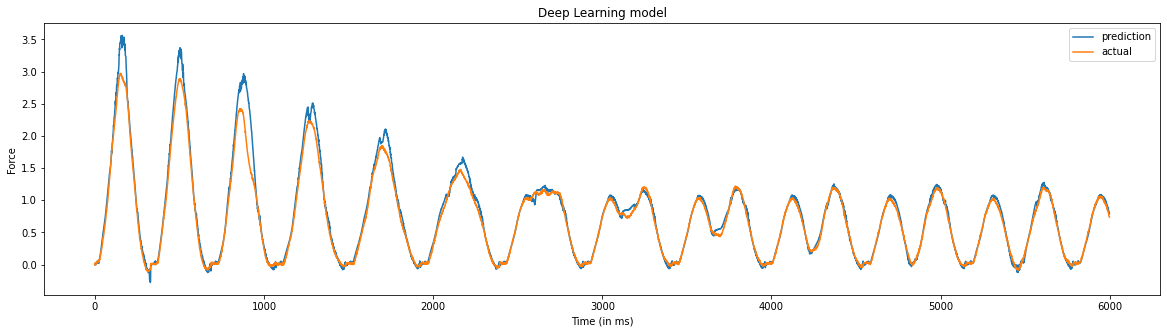

In [16]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

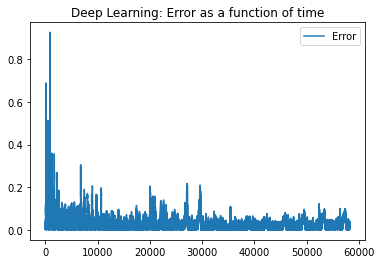

In [17]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Deep Learning: Error as a function of time')
plt.show()

In [18]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error2)
print('Median Value of Error =',error3[len(error2)//2])

Minimum Error = [2.3841858e-07]
Maximum Error = [0.9265578]
Median Value of Error = [0.01930155]


# RBF

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
clf = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [21]:
y1_pred = clf.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.09711080272467655


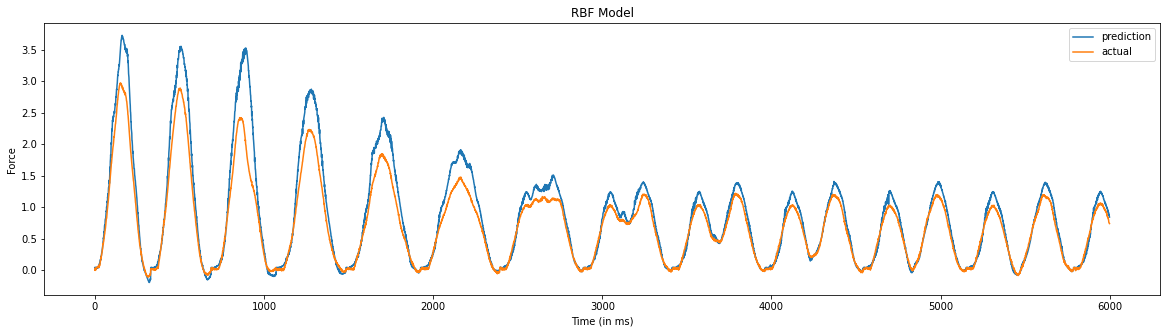

In [22]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('RBF Model')
plt.show()

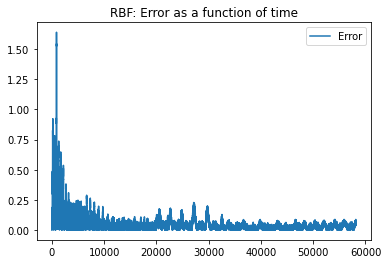

In [25]:
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error5, label = 'Error')
plt.legend()
plt.title('RBF: Error as a function of time')
plt.show()

In [26]:
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])

Minimum Error = 2.898713248322693e-07
Maximum Error = 1.6408830599132698
Median Value of Error = 0.02800820977628604


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

Root Mean Squared error of Random Forest 0.07109232484431911


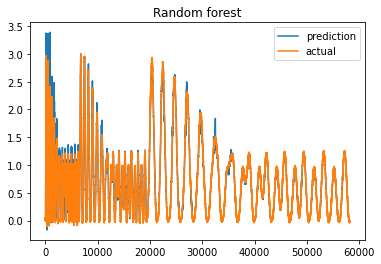

In [29]:
plt.plot(list(range(len(y1_pred))),y1_pred, label = 'prediction')
plt.plot(list(range(len(y1_pred))),y_test, label = 'actual')
plt.legend()
plt.title('Random forest')
plt.show()

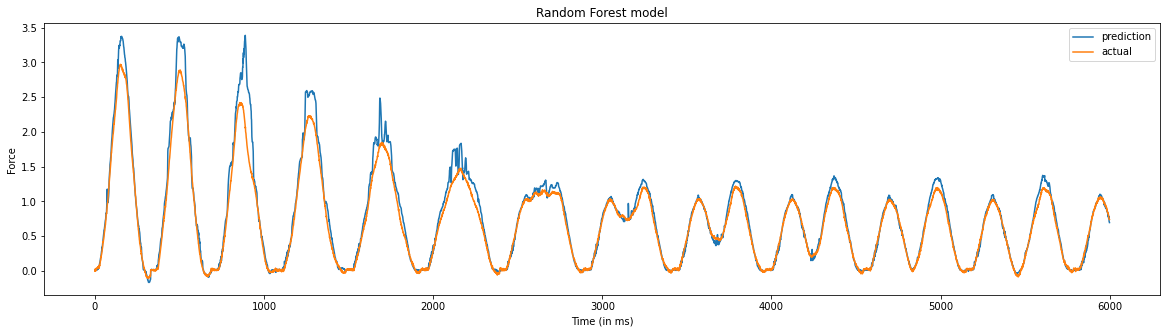

In [30]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Random Forest model')
plt.show()

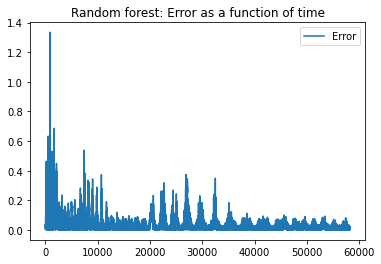

In [31]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error, label = 'Error')
plt.legend()
plt.title('Random forest: Error as a function of time')
plt.show()

In [32]:
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])

Minimum Error = 2.000000000335067e-07
Maximum Error = 1.3349364500000003
Median Value of Error = 0.018726266666666658
